In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

from matplotlib import pyplot

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [2]:
df = pd.read_csv('SojaPython.csv')


In [3]:
display(df.dtypes)
display(df.head(3))

Data       object
Máxima    float64
dtype: object

,Data,Máxima
0,01.1.2016,878.729500
1,01.1.2017,1043.520500
2,01.1.2018,979.952381


In [4]:
character = df['Data'][0][2]
df['Data'] = pd.to_datetime(df['Data'],format='%d{0}%m{0}%Y'.format(character))

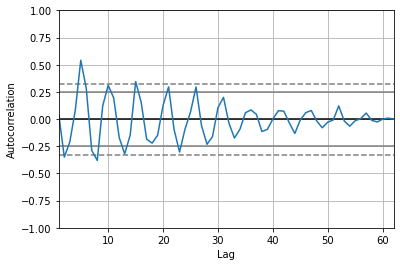

In [5]:
autocorrelation_plot(df.set_index("Data"))
pyplot.show()

In [6]:
model = ARIMA(df.set_index("Data"), order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Máxima   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -325.216
Method:                       css-mle   S.D. of innovations             48.191
Date:                Thu, 23 Apr 2020   AIC                            664.432
Time:                        00:13:12   BIC                            679.208
Sample:                             1   HQIC                           670.223
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0145      1.024     -0.014      0.989      -2.022       1.993
ar.L1.D.Máxima    -1.1583      0.110    -10.491      0.000      -1.375      -0.942
ar.L2.D.Máxima    -1.3180      0.124

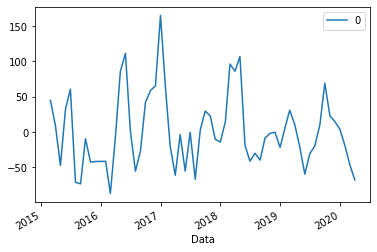

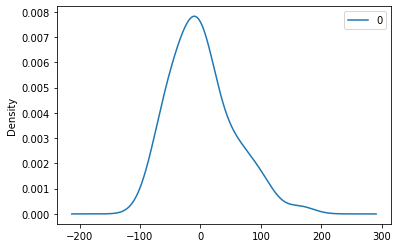

                0
count   61.000000
mean     1.766723
std     51.940140
min    -86.957144
25%    -39.626489
50%     -3.449001
75%     29.837917
max    164.805451


In [7]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=881.365567, expected=878.858696
predicted=924.046808, expected=878.375000
predicted=944.776823, expected=883.915238
predicted=961.756667, expected=969.035714
predicted=936.218335, expected=973.012500
predicted=885.438288, expected=845.562500
predicted=874.161698, expected=887.368571
predicted=916.396657, expected=899.237273
predicted=935.537626, expected=983.797143
predicted=949.624371, expected=981.853636
predicted=868.140088, expected=867.416667
predicted=888.567258, expected=934.087500
predicted=936.252721, expected=871.792000
predicted=942.045053, expected=1016.863333
predicted=976.042708, expected=993.810952
predicted=881.267066, expected=889.510870
predicted=926.609254, expected=917.982857
predicted=915.796875, expected=885.482609
predicted=978.053586, expected=1033.026667
predicted=986.275379, expected=981.788000
predicted=892.962852, expected=907.227727
predicted=923.956666, expected=914.344800
Test MSE: 1325.929


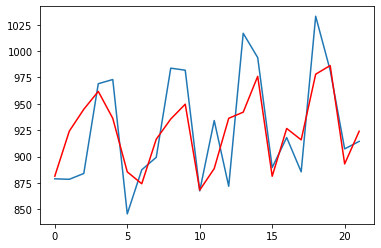

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



series = df.set_index("Data")
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

#train_data, test_data = train_test_split(df.set_index("yearMonth"), test_size=0.2)

size = int(len(df.set_index("Data")) * 0.66)
train_data, test_data = df.set_index("Data")[0:size], df.set_index("Data")[size:len(df.set_index("Data"))]

scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [11]:
lstm_model.fit_generator(generator,epochs=20)


Epoch 1/20
28/28 [==============================] - 1s 26ms/step - loss: 0.0669
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0662
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0618
Epoch 4/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0599
Epoch 5/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 6/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0616
Epoch 7/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0669
Epoch 8/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0600
Epoch 9/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0628
Epoch 10/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0627
Epoch 11/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0671
Epoch 12/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0635
Epoch 13/20
28/28 [=============================

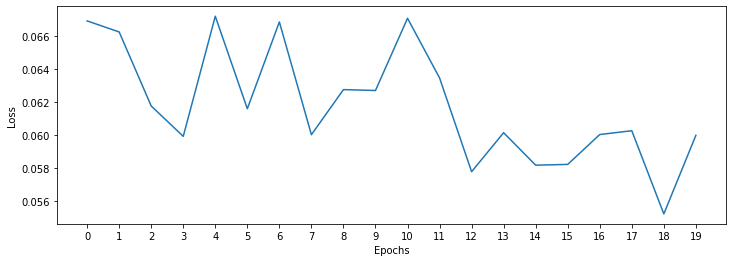

In [12]:
import matplotlib.pyplot as plt
import numpy as np

losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [13]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [14]:
lstm_predictions_scaled

[array([0.31860134], dtype=float32),
 array([0.3038992], dtype=float32),
 array([0.30532712], dtype=float32),
 array([0.30614868], dtype=float32),
 array([0.30862385], dtype=float32),
 array([0.30268607], dtype=float32),
 array([0.29428306], dtype=float32),
 array([0.29085344], dtype=float32),
 array([0.29682323], dtype=float32),
 array([0.2987069], dtype=float32),
 array([0.2978466], dtype=float32),
 array([0.29215592], dtype=float32),
 array([0.29124695], dtype=float32),
 array([0.2907309], dtype=float32),
 array([0.29049355], dtype=float32),
 array([0.29016414], dtype=float32),
 array([0.2897922], dtype=float32),
 array([0.28934637], dtype=float32),
 array([0.28902283], dtype=float32),
 array([0.288875], dtype=float32),
 array([0.28878322], dtype=float32),
 array([0.28854913], dtype=float32)]

In [15]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[945.98953934],
       [941.357877  ],
       [941.80771876],
       [942.06653761],
       [942.84629901],
       [940.97569974],
       [938.3284749 ],
       [937.24803034],
       [939.1287131 ],
       [939.72212718],
       [939.45110298],
       [937.65835498],
       [937.37199901],
       [937.20942392],
       [937.13465215],
       [937.03087863],
       [936.91370739],
       [936.77325214],
       [936.67132819],
       [936.62476013],
       [936.59584287],
       [936.52209448]])

In [16]:
print(test_data.columns)
test_data['LSTM_Predictions'] = lstm_predictions



Index(['Máxima'], dtype='object')


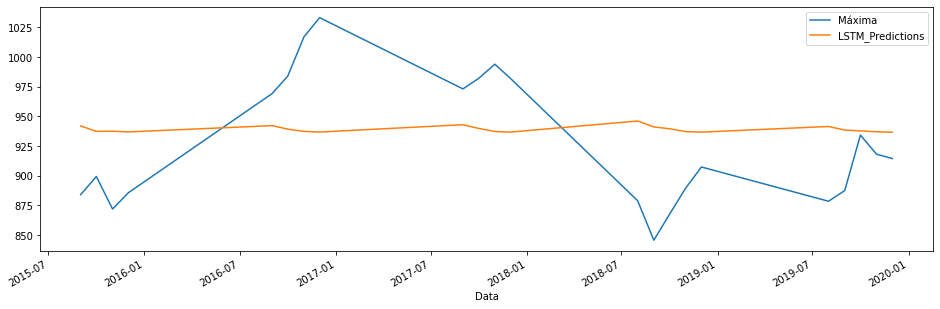

In [17]:
test_data['Máxima'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [18]:
from statsmodels.tools.eval_measures import rmse

lstm_rmse_error = rmse(test_data['Máxima'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Máxima'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 3061.956882520312
RMSE Error: 55.33495172601411
Mean: 949.690048197236


In [20]:
display(df)

,Data,Máxima
0,2016-01-01,878.729500
1,2017-01-01,1043.520500
2,2018-01-01,979.952381
3,2019-01-01,918.836000
4,2020-01-01,928.620000
...,...,...
57,2015-12-01,885.482609
58,2016-12-01,1033.026667
59,2017-12-01,981.788000
60,2018-12-01,907.227727


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
from sklearn import preprocessing
import warnings

In [26]:
df.set_index = df['Data']
df.dtypes

Data      datetime64[ns]
Máxima           float64
dtype: object

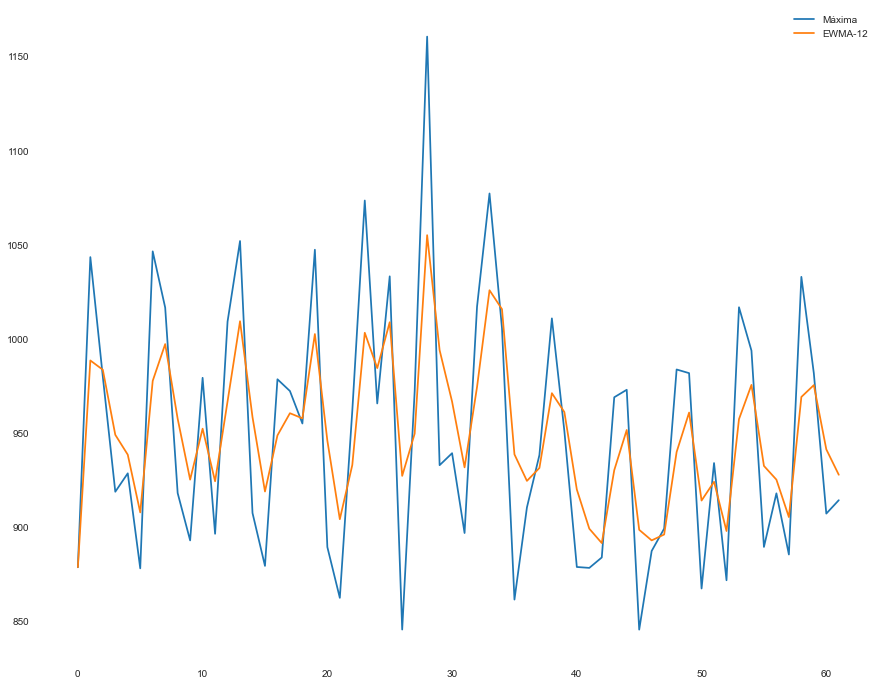

In [30]:
df['EWMA-12'] = df['Máxima'].ewm(span=3).mean()
df[['Máxima','EWMA-12']].plot(figsize=(15,12));

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = df[0:40]
test = df[40:]

display(train.head(2))
display(test.head(2))

,Data,Máxima,EWMA-12
0,2016-01-01,878.7295,878.729500
1,2017-01-01,1043.5205,988.590167


,Data,Máxima,EWMA-12
40,2018-08-01,878.858696,920.022784
41,2019-08-01,878.375000,899.198892


In [69]:
fittedModel = ExponentialSmoothing(train['Máxima'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
fittedModelTest = ExponentialSmoothing(test['Máxima'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [70]:
test_predictions = fittedModel.forecast(12).rename('HW Forecast')
train_predictions =  fittedModelTest.forecast(12).rename('HW Forecast2')

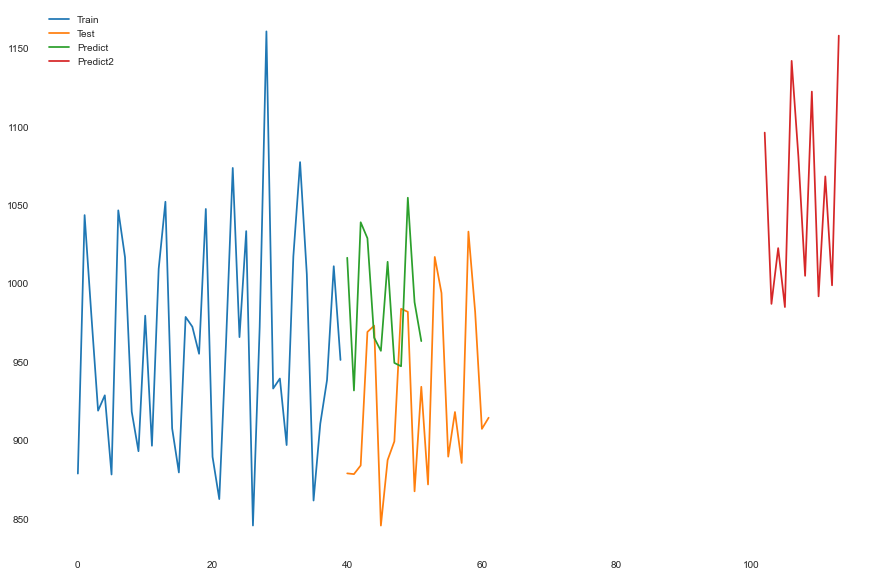

In [71]:
train['Máxima'].plot(legend=True,label='Train',figsize=(15,10))
test['Máxima'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predict');
train_predictions.plot(legend=True,label='Predict2');